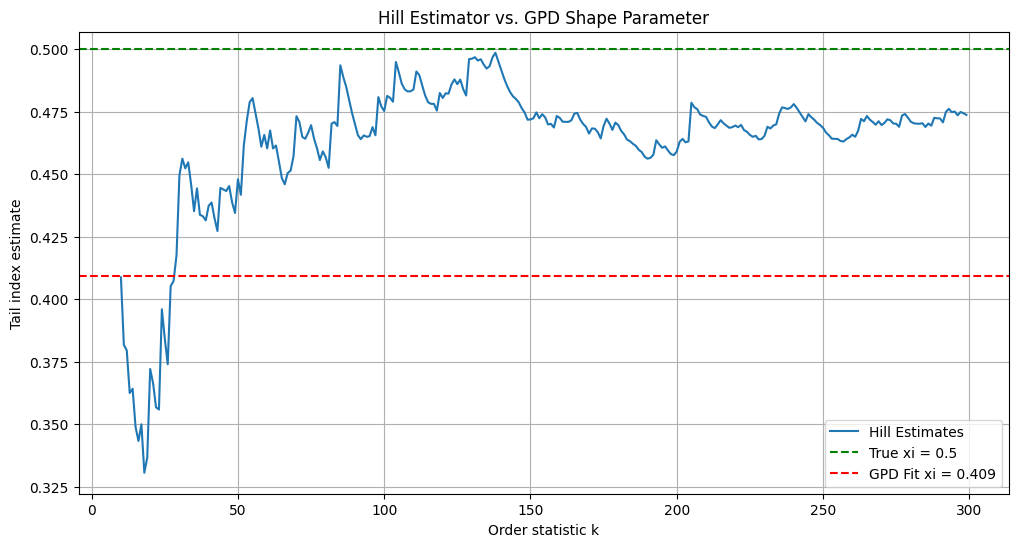

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genpareto
from statsmodels.distributions.empirical_distribution import ECDF

# Set seed for reproducibility
np.random.seed(42)

# 1. Simulate data from a Pareto distribution
xi_true = 0.5  # true shape parameter
sample_size = 5000
x = (np.random.pareto(a=1/xi_true, size=sample_size) + 1)

# Sort in descending order
x_sorted = np.sort(x)[::-1]

# 2. Hill estimator function
def hill_estimator(x_sorted, k):
    x_kplus1 = x_sorted[k]
    hill = (1 / k) * np.sum(np.log(x_sorted[:k]) - np.log(x_kplus1))
    return hill

# 3. Compute Hill estimates for different values of k
ks = np.arange(10, 300)
hill_estimates = [hill_estimator(x_sorted, k) for k in ks]

# 4. Fit GPD to exceedances over a high threshold
threshold = np.percentile(x, 90)
exceedances = x[x > threshold] - threshold
gpd_fit = genpareto.fit(exceedances, floc=0)  # floc=0 fixes location at 0
xi_gpd = gpd_fit[0]

# 5. Plot results
plt.figure(figsize=(12, 6))
plt.plot(ks, hill_estimates, label='Hill Estimates')
plt.axhline(y=xi_true, color='green', linestyle='--', label=f'True xi = {xi_true}')
plt.axhline(y=xi_gpd, color='red', linestyle='--', label=f'GPD Fit xi = {xi_gpd:.3f}')
plt.xlabel('Order statistic k')
plt.ylabel('Tail index estimate')
plt.title('Hill Estimator vs. GPD Shape Parameter')
plt.legend()
plt.grid(True)
plt.show()